# Trabalho Final

## Aluna: Maria Eduarda Alves da Silva

###0. Imports

Nessa seção iremos importar as bibliotecas necessárias

In [184]:
# importando as bibliotecas

# manipulação dos dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# aplicação do modelo
from sklearn.model_selection import train_test_split # holdout
from sklearn.preprocessing import StandardScaler # padronização

from sklearn.linear_model import LinearRegression # regressão linear
from xgboost import XGBRegressor # modelo ensemble XGboost
from sklearn.model_selection import cross_val_score # cross validation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error,root_mean_squared_error # métricas


###1. Carregar a base de dados
Abaixo iremos carregar a base de dados "Life Expectancy Data.csv" e exibir as 5 linhas iniciais do dataset.

O dataset está disponível em: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

Obs: iremos considerar a variável de saída: **Life expectancy**

In [ ]:
# leitura do dataset
df_lf_exp = pd.read_csv(r'Life Expectancy Data.csv')

df_lf_exp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


###2. Análise exploratória
Faça uma exploração dos dados, procurando verificar:

#### Descrição das colunas do conjunto de dados

| Coluna | Descrição |
|:---|:---|
| **Country** | Nome do país analisado. |
| **Year** | Ano da observação dos dados. |
| **Status** | Status de desenvolvimento do país ("Developed" ou "Developing"). |
| **Life expectancy** | Expectativa de vida ao nascer (em anos). |
| **Adult Mortality** | Probabilidade de morte entre 15 e 60 anos por 1000 adultos. |
| **infant deaths** | Número de mortes de bebês menores de 1 ano por 1000 nascimentos. |
| **Alcohol** | Consumo de álcool per capita (em litros por ano). |
| **percentage expenditure** | Gasto com saúde em relação ao PIB (em %). |
| **Hepatitis B** | Cobertura vacinal contra Hepatite B em crianças (em %). |
| **Measles** | Número de casos reportados de sarampo por 1000 habitantes. |
| **BMI** | Índice médio de Massa Corporal (Body Mass Index) da população. |
| **under-five deaths** | Número de mortes de crianças menores de 5 anos por 1000 nascidos vivos. |
| **Polio** | Cobertura vacinal contra poliomielite (em %). |
| **Total expenditure** | Gasto total com saúde como porcentagem do PIB. |
| **Diphtheria** | Cobertura vacinal contra difteria em crianças (em %). |
| **HIV/AIDS** | Taxa de mortalidade por HIV/AIDS (por 1000 habitantes). |
| **GDP** | Produto Interno Bruto per capita (em dólares). |
| **Population** | População total do país no ano de análise. |
| **thinness 1-19 years** | Percentual de magreza entre crianças e adolescentes de 1 a 19 anos. |
| **thinness 5-9 years** | Percentual de magreza entre crianças de 5 a 9 anos. |
| **Income composition of resources** | Índice de desenvolvimento baseado na composição de recursos (ligado à renda). |
| **Schooling** | Média de anos de escolaridade esperada para crianças. |


a) quais são as features, observando os tipos delas (numéricas ou categóricas) e se precisam de algum pré-processamento;

In [187]:
df_lf_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

**Observações:**

**Tipagem das colunas**

1 - colunas do tipo string/object - Country, Status

2 - colunas do tipo int - year, infant deaths, measles, under-five deaths

3 - colunas do tipo float - life expectancy, adult mortality, alcohol, percentage expenditure, hepatitis B, BMI, polio, total expenditure, diphtheria, HIV/AIDS, population, thinness 1-19 years, thinness 5-9 years, Income composition of resources, schooling

**verificando se existem dados duplicados**

In [188]:
df_lf_exp.duplicated().sum()

np.int64(0)

Não existe valores duplicados

**verificação das colunas categóricas**


In [189]:
# temos dois status para os países
df_lf_exp['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [190]:
print(f"Existem {len(df_lf_exp['Country'].unique())} países no dataset")

Existem 193 países no dataset


In [191]:
df_lf_exp.groupby(['Status'])['Country'].count()

,Country
Status,
Developed,512
Developing,2426


**Observações:**

Existem mais países em desenvolvimento do que desenvolvidos

In [192]:
# observando a média do TOP 15 países desenvolvidos
df_lf_exp[df_lf_exp['Status'] == 'Developed'].groupby(['Country'])['Life expectancy'].mean().sort_values(ascending=False).head(15)

,Life expectancy
Country,
Japan,82.53750
Sweden,82.51875
Iceland,82.44375
Switzerland,82.33125
Italy,82.18750
Spain,82.06875
Australia,81.81250
Norway,81.79375
Austria,81.48125


Observando a média dos países desenvolvidos, podemos dizer que eles obtém uma expectativa de vida muito elevada. De acordo com a amostra do top 15, os países estão localizados, majoritariamente, na Europa. Estes dados estão próximos da realidade descrita em matérias apresentadas publicamente. Segue a visão descrita pelo site europanway (https://europeanway.com.br/longevidade-na-europa-quais-sao-os-europeus-que-vivem-mais-tempo/):

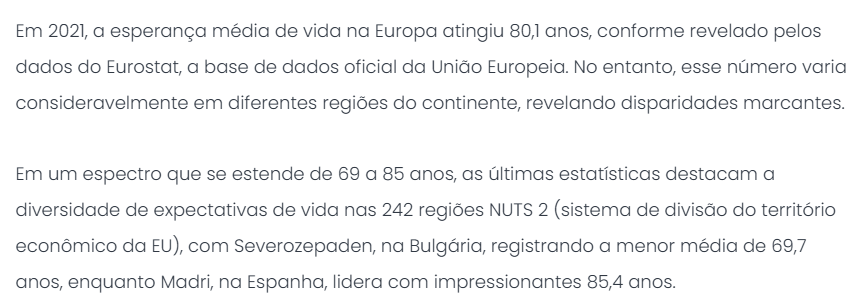

In [193]:
# observando a média do TOP 15 países com piores expectativas de vida e classificados em desenvolvimento
df_lf_exp[df_lf_exp['Status'] == 'Developing'].groupby(['Country'])['Life expectancy'].mean().sort_values(ascending=True).head(15)

,Life expectancy
Country,
Sierra Leone,46.11250
Central African Republic,48.51250
Lesotho,48.78125
Angola,49.01875
Malawi,49.89375
Chad,50.38750
Côte d'Ivoire,50.38750
Zimbabwe,50.48750
Swaziland,51.32500


**Observação:**

Majoritariaemnte, os países com baixa expectativa de vida estão localizados na África. De acordo com a pesquisa apontada pelo site mundocoop (https://mundocoop.com.br/longevidade/quais-sao-os-paises-onde-as-pessoas-vivem-mais-aqui-esta-o-mapa-geografico-da-longevidade/#:~:text=Pa%C3%ADses%20com%20menor%20expectativa%20de%20vida%20*,Guin%C3%A9%20(59%2C55%20anos)%20*%20Mali%20(60%2C03%20anos)) podemos comprovar esta suposição:


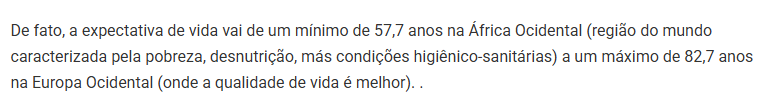

**Transformando os dados categóricos em binários**

Como existem muitos países na lista, não vamos considerar a coluna de Country para o processo de binarização. Se fizermos o processo de OneHotEncoding vamos aumentar consideravelmente a dimensionalidade do dataset e se fizermos o Label Encoder não temos uma escala numérica que represente os países. Logo, vou considerar apenas a coluna de STATUS aplicando o One hot Enconding

In [194]:
# Aplicando o One Hot Encoding na variável 'Status'
df_lf_exp = pd.get_dummies(df_lf_exp, columns=['Status'],drop_first=True)

df_lf_exp.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,True
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,True
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,True
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,True
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,True


b) as informações estatísticas básicas das colunas do dataset;

In [195]:
df_lf_exp.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


**Observações:**

* Podemos identificar que existe uma diferença na escala dos valores pois temos colunas com o número máximo muito alto em comparação com outras.

informações relevantes:
* Year: período de 2000 até 2015
* life expectancy: 36,3 até 89




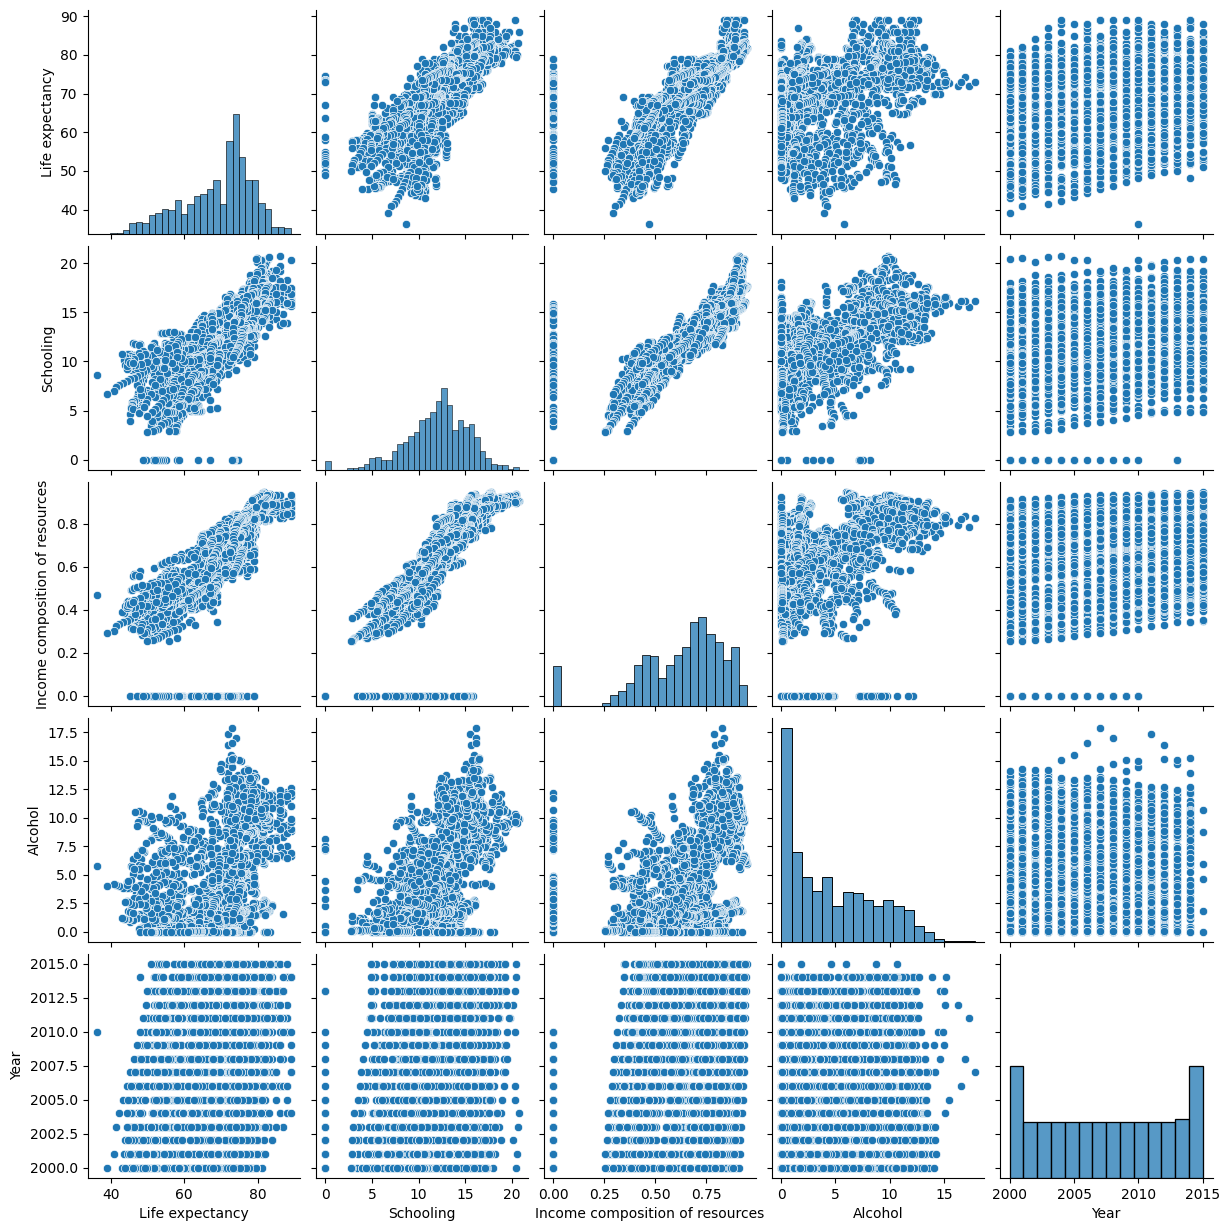

In [196]:
# visualizando algumas distribuições de algumas features com a coluna alvo
sns.pairplot(df_lf_exp[['Life expectancy','Schooling','Income composition of resources','Alcohol','Year']])
plt.show()

c) se há dados faltantes, decida o que fazer: preencher com algum valor default, descartar algumas linhas ou descartar algumas colunas;

Obs: Pode ser mais de uma operação. Você pode selecionar algumas colunas para descartar primeiro e depois as linhas com valores faltantes, por exemplo.


**Colunas com valores nulos**

1 - Adult Mortality, Life expectancy, Alcohol, hepatitis B, BMI, Polio, Total expenditure, Diphtheria, GDP,  population, thinness 1-19 years, thinness 5-9 years, Income composition of resources, schooling

Para verificar quais colunas são interessantes de serem descartadas do dataset, vou analisar a correlação entre elas com a variável alvo.

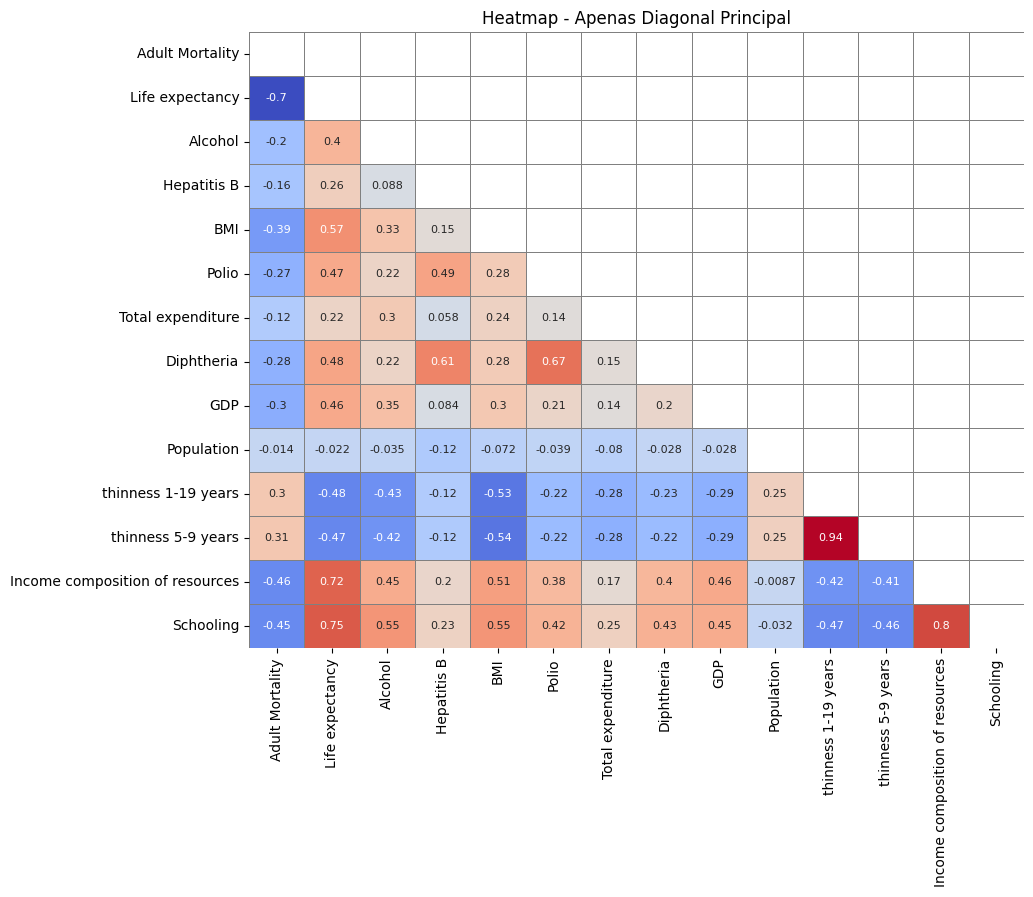

In [197]:
df_corr = df_lf_exp[['Adult Mortality',
                    'Life expectancy',
                    'Alcohol',
                    'Hepatitis B',
                    'BMI',
                    'Polio',
                    'Total expenditure',
                    'Diphtheria',
                    'GDP','Population',
                    'thinness 1-19 years','thinness 5-9 years',
                    'Income composition of resources','Schooling']].copy()

corr = df_corr.corr()

# Criar uma matriz onde só a diagonal principal é mantida
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask = mask,annot=True, cmap='coolwarm', cbar=False, linewidths=0.5, linecolor='gray',annot_kws={"size": 8})
plt.title('Heatmap - Apenas Diagonal Principal')
plt.show()

Vou considerar as colunas com baixa correlação em relação a variável alvo para serem retiradas do dataset. São elas:
* Population

In [198]:
df_lf_exp.drop(columns=['Population'],inplace=True)

In [199]:
# observando os valores que ainda estão faltando
df_lf_exp.isnull().sum().sort_values(ascending=False)

,0
Hepatitis B,553
GDP,448
Total expenditure,226
Alcohol,194
Income composition of resources,167
Schooling,163
thinness 5-9 years,34
thinness 1-19 years,34
BMI,34
Polio,19


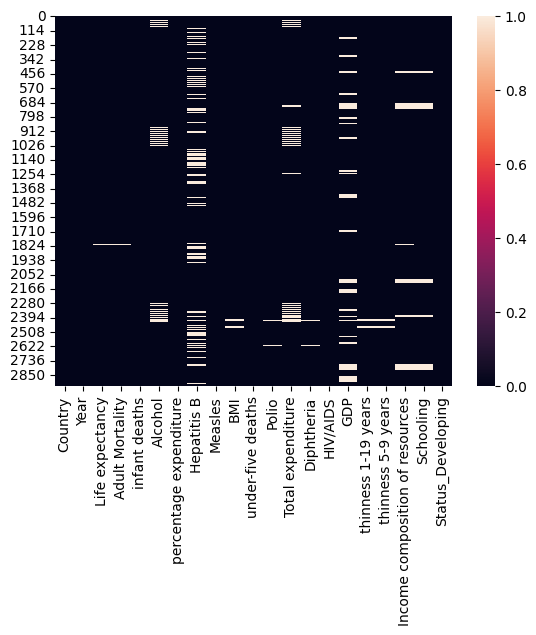

In [200]:
sns.heatmap(df_lf_exp.isnull())
plt.show()

* Irei deletar todas as linhas que correspondem aos valores nulos do dataset, pois como são países com características distintas não irei preencher com a média para não "poluir" os dados puxando uma determinada característica para cima ou para baixo. Isto poderia influenciar no modelo negativamente.

In [201]:
# Excluindo os valores nulos das colunas
df_lf_exp.dropna(axis=0,inplace=True)

In [202]:
df_lf_exp.isnull().sum().sort_values(ascending=False)

,0
Country,0
Year,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0
BMI,0


In [203]:
df_lf_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1853 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1853 non-null   object 
 1   Year                             1853 non-null   int64  
 2   Life expectancy                  1853 non-null   float64
 3   Adult Mortality                  1853 non-null   float64
 4   infant deaths                    1853 non-null   int64  
 5   Alcohol                          1853 non-null   float64
 6   percentage expenditure           1853 non-null   float64
 7   Hepatitis B                      1853 non-null   float64
 8   Measles                          1853 non-null   int64  
 9   BMI                              1853 non-null   float64
 10  under-five deaths                1853 non-null   int64  
 11  Polio                            1853 non-null   float64
 12  Total expenditure        

Após a retirada dos valores nulos os dados diminuiram de 2.938 para 1.853, sendo deletadas 1085 linhas (cerca de 37% dos dados)

d) a matriz de correlação das entradas com a saída;

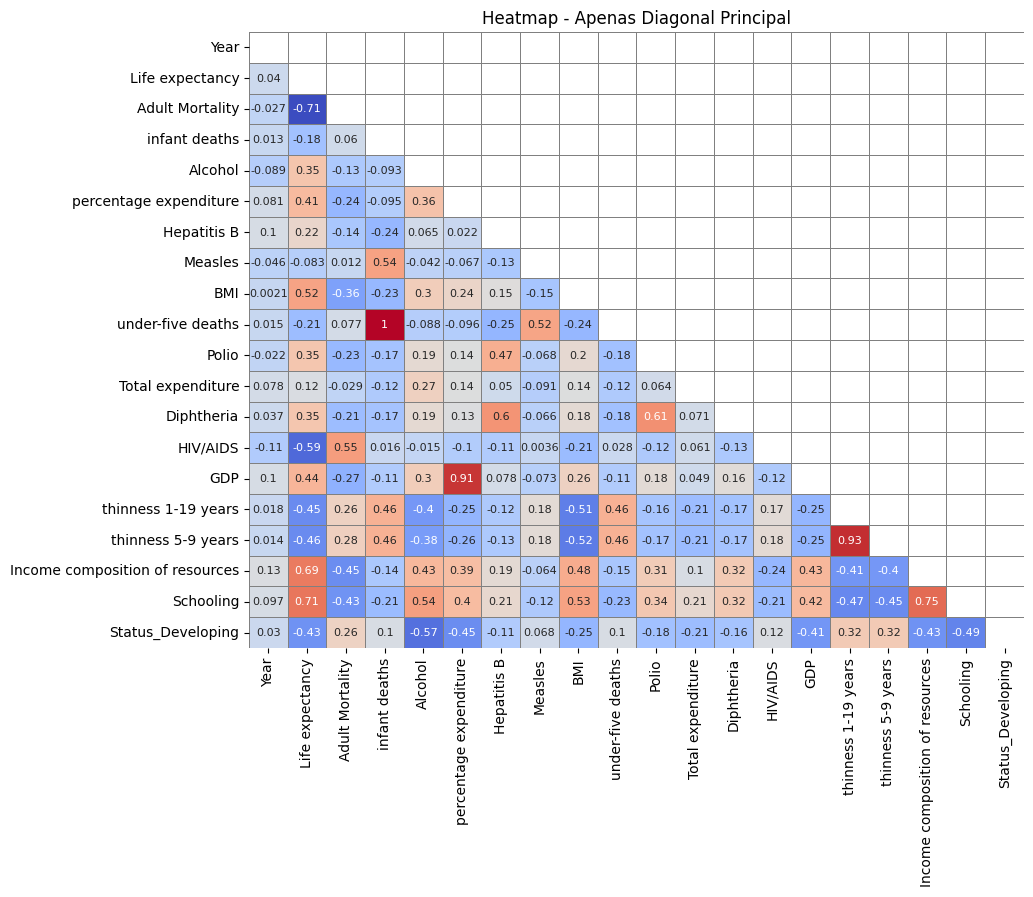

In [204]:
corr = df_lf_exp.drop(columns={'Country'}).corr()

# Criar uma matriz onde só a diagonal principal é mantida
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask = mask,annot=True, cmap='coolwarm', cbar=False, linewidths=0.5, linecolor='gray',annot_kws={"size": 8})
plt.title('Heatmap - Apenas Diagonal Principal')
plt.show()

e) quais as features que mais possuem correlação (negativamente ou positivamente) com a saída?

**Resposta**

* features com correlação positiva (acima de 50%):
  * income composition of resources com life expectancy - 69%
  * schooling com life expectancy - 71%

* features com correlação negativa (acima de 50%):
  * adult mortality com life expectancy -> -71%
  * HIV/AIDS com life expectancy -> -59%



f) com base na matriz de correlação, encontre duas features que são redundantes entre si.

*Obs:* uma feature redundante com outra é uma feature cuja correlação com outra feature é próxima de 1 ou de -1;

**Resposta**

* features com correlação redutante:
  * under-five deaths com infant deaths - 100%


g) com base na correlação dessas duas features redundantes com a variável de saída, qual das duas você removeria do seu dataset, caso lhe fosse pedido para remover a redundância?

**Resposta:** Removeria a coluna de under-five deaths pois a coluna de infant deaths já nos traz a mesma informação.

In [205]:
# removendo a coluna com redundância
df_lf_exp.drop(columns='under-five deaths',inplace=True)

h) com base nas correlações das features com a saída, você acredita que esse dataset oferece condições de predizer a variável de saída?

**Resposta**

Sim, acredito que as colunas podem predizer pois a maioria delas contém uma correlação acima de 10% tendo umas mais de 50%

###3. Divisão de treinamento e teste
Divida o dataset em conjunto de treinamento (70%) e de teste (30%);

In [206]:
X_train, X_test, y_train, y_test = train_test_split(
                                      df_lf_exp.drop(columns={'Country','Life expectancy'}),
                                      df_lf_exp['Life expectancy'],
                                      test_size=0.3, random_state=42)

In [207]:
X_train.head(1)

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
831,2002,24.0,3,2.97,29.685294,81.0,0,47.0,81.0,7.9,81.0,0.4,248.4125,2.0,1.9,0.621,11.8,True


In [208]:
X_test.head(1)

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
285,2002,283.0,25,1.23,40.488152,15.0,1588,19.2,76.0,4.27,75.0,2.1,418.698576,9.3,9.2,0.407,7.3,True


###4. Tratamento dos dados
Aplique a padronização, de forma separada, nos conjuntos de treinamento e de teste;

In [209]:
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train) #retorno é um array
X_test_scaled = std.transform(X_test)

In [210]:
X_train_scaled[0]

array([-1.41770619, -1.11782206, -0.23326848, -0.34443284, -0.41158165,
        0.01404523, -0.20958876,  0.4027324 , -0.18948343,  0.88143684,
       -0.17950411, -0.24001257, -0.50203578, -0.63960387, -0.65986235,
       -0.10101324, -0.15550574,  0.42192414])

###Regressão Linear

Use a Regressão Linear para predizer a expectativa de vida (variável de saída **Life expectancy**)

In [211]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

####Avaliação da Regressão Linear
Crie gráficos de linha para visualizar a performance do modelo.

##### Avaliação visual
Primeiro, faça um gráfico mostrando o valor predito (dados de teste) sobre o valor real com todos os pontos.

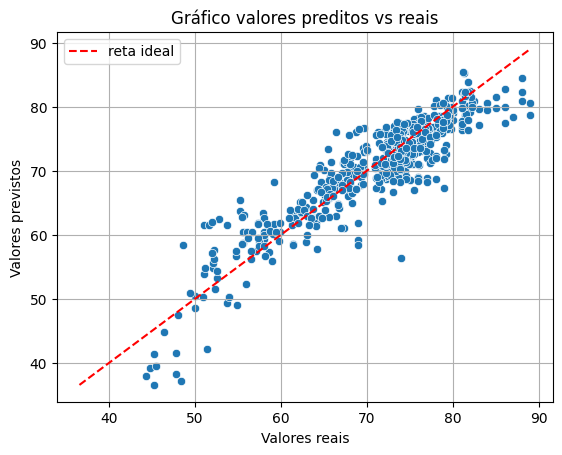

In [212]:
y_reg_pred = lr.predict(X_test_scaled) # valor previsto
sns.scatterplot(x=y_test, y=y_reg_pred)

# linha reta ideal
min_val = min(y_test.min(), y_reg_pred.min())
max_val = max(y_test.max(), y_reg_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--',label='reta ideal')

plt.title("Gráfico valores preditos vs reais")
plt.xlabel("Valores reais")
plt.ylabel("Valores previstos")
plt.legend()
plt.grid(True)
plt.show()

Para facilitar a visualização, faça um gráfico apenas dos 100 primeiros pontos.

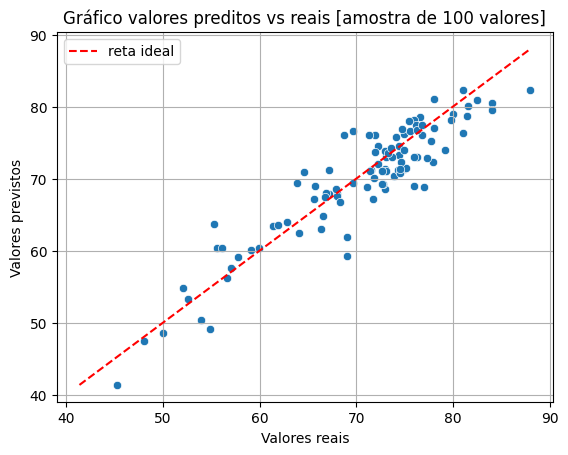

In [213]:
y_reg_pred_interval = y_reg_pred[0:100]
y_test_interval = y_test[0:100]
sns.scatterplot(x=y_test_interval, y=y_reg_pred_interval)

# reta ideal
min_val = min(y_test_interval.min(), y_reg_pred_interval.min())
max_val = max(y_test_interval.max(), y_reg_pred_interval.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--',label='reta ideal')

plt.title("Gráfico valores preditos vs reais [amostra de 100 valores]")
plt.xlabel("Valores reais")
plt.ylabel("Valores previstos")
plt.legend()
plt.grid(True)
plt.show()

Agora, faça um gráfico exibindo o erro entre os pontos (valor real - valor predito) - Resíduo.

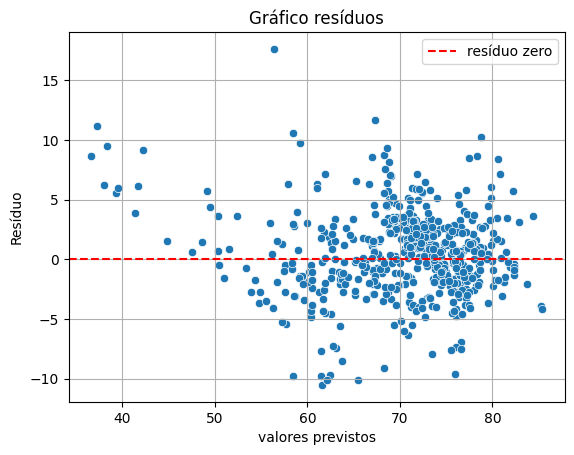

In [214]:
res_reg = y_test - y_reg_pred
sns.scatterplot(x=y_reg_pred, y=res_reg)
plt.axhline(0, color='red', linestyle='--',label='resíduo zero')
plt.title("Gráfico resíduos")
plt.xlabel("valores previstos")
plt.ylabel("Resíduo")
plt.legend()
plt.grid(True)
plt.show()

Com base nas visualizações, você considera que o modelo conseguiu predizer bem a saída?

**Resposta**

* Para os 2 primeiros gráficos é possível identificar que a medida que os valores reais crescem os valores previstos acompanham este crescimento. Ou seja, o modelo conseguiu generalizar bem as predições contudo para os dados nos extremos ele está mais disperso. Os dados também estão bem concentrados no intervalo de valores previstos entre 60 a 80.

* Para a visão dos resíduos é possível identificar que há uma dispersão maior em relação a linha zero. A concentração dos dados estão dentro do intervalo de resíduos de -5 a 5 em grande maioria. É possível verificar que também existem alguns valores com resíduo maior mas não são em grande quantidade.

##### Avaliação por métricas
Avalie o modelo quantitativamente utilizando as métricas aprendidas (MEAN, MAPE, MSE, RMSE e R²) e verifique se sua impressão visual se confirma.

In [215]:
def print_metrics(y_test_in, y_test_pred_in):
  """
  função que retorna os valores das métricas de avaliação do modelo mean, mape, mse, rmse e r2
  """
  print("MAE: ", mean_absolute_error(y_test_in, y_test_pred_in))
  print("MAPE: ", mean_absolute_percentage_error(y_test_in, y_test_pred_in))
  print("MSE: ", mean_squared_error(y_test_in, y_test_pred_in))
  print("RMSE: ", root_mean_squared_error(y_test_in, y_test_pred_in))
  print("R²: ", r2_score(y_test_in, y_test_pred_in))

In [216]:
print_metrics(y_test,y_reg_pred)

MAE:  2.6823654550061566
MAPE:  0.03955251042630027
MSE:  12.70470463096604
RMSE:  3.56436595076404
R²:  0.8202233659381558


**Resposta**

O modelo trouxe um coeficiente de determinação de 82%, não sendo um valor muito alto mas ainda sim bom. Contudo, o valor de erro para o MAE está acima de 2 e o MSE está 12 podendo indicar que existem regiões que possam ter outliers.

##### Validação cruzada
Utilize validação cruzada (cross validation score) usando a métrica R2 com 10 folds (parametro cv=10) para avaliar o modelo.

In [228]:
cvs_score = cross_val_score(lr, X_train_scaled,y_train,cv=10,scoring='r2')

cvs_score

array([0.77210424, 0.85261338, 0.81394041, 0.78531452, 0.83958507,
       0.76869024, 0.80994318, 0.77729681, 0.84253778, 0.77783029])

In [229]:
print(f"Média do score via validação cruzada: {np.mean(cvs_score)*100:.2f}")

Média do score via validação cruzada: 80.40


###XGBoost

Use o modelo XGBoost para predizer a expectativa de vida (variável de saída **Life expectancy**)

In [220]:
# [INSIRA CÓDIGO AQUI]
xgr = XGBRegressor(random_state=42)
xgr.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [221]:
xgr.score(X_test_scaled,y_test)

0.9461015782975083

####Avaliação do XGBoost
Crie gráficos de linha para visualizar a performance do modelo.

##### Avaliação visual
Primeiro, faça um gráfico mostrando o valor predito (dados de teste) sobre o valor real com todos os pontos.

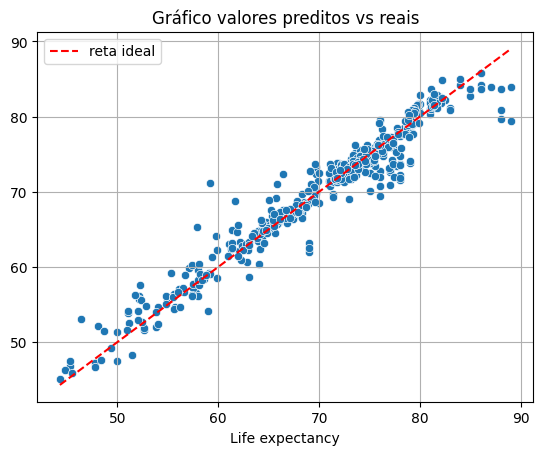

In [222]:
y_xgr_pred = xgr.predict(X_test_scaled)
sns.scatterplot(x=y_test, y=y_xgr_pred)

min_val = min(y_test.min(), y_xgr_pred.min())
max_val = max(y_test.max(), y_xgr_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--',label='reta ideal')

plt.title("Gráfico valores preditos vs reais")
plt.grid(True)
plt.legend()
plt.show()

Para facilitar a visualização, faça um gráfico apenas dos 100 pontos.

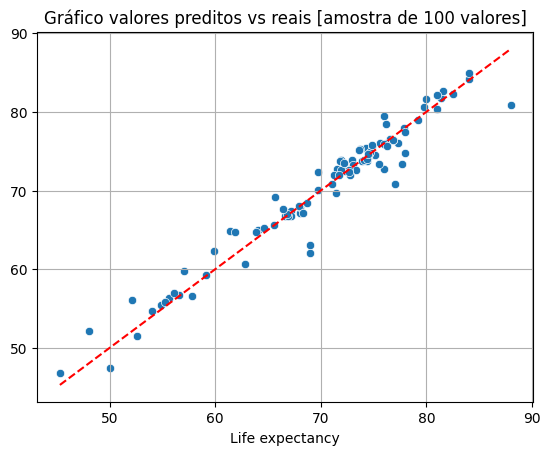

In [223]:
y_xgr_pred_interval = y_xgr_pred[0:100]
y_test_xgr_interval = y_test[0:100]
sns.scatterplot(x=y_test_xgr_interval, y=y_xgr_pred_interval)

min_val = min(y_test_xgr_interval.min(), y_xgr_pred_interval.min())
max_val = max(y_test_xgr_interval.max(), y_xgr_pred_interval.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--',label='reta ideal')


plt.title("Gráfico valores preditos vs reais [amostra de 100 valores]")
plt.grid(True)
plt.show()

Agora, faça um gráfico exibindo o erro entre os pontos dos resíduos, i.e., valor real - valor predito.

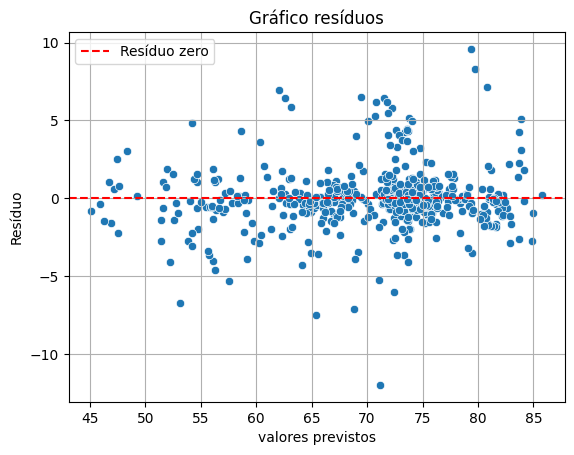

In [224]:
res_xgr = y_test - y_xgr_pred
sns.scatterplot(x=y_xgr_pred, y=res_xgr)
plt.axhline(0, color='red', linestyle='--',label='Resíduo zero')
plt.grid(True)
plt.title("Gráfico resíduos")
plt.xlabel("valores previstos")
plt.ylabel("Resíduo")
plt.legend()
plt.show()

Com base nas visualizações, você considera que o modelo conseguiu predizer bem a saída?

**Resposta**

* Os gráficos 1 e 2 apresentam um melhor resultado em comparação com a regressão linear, pois é possível verificar que os valores dos pontos de extremo que antes estavam longe da reta ideal estão mais ajustados ao que deveriam ser. E também pode-se perceber que a distribuição dos dados está melhor na reta ideal.

* Distribuição dos resíduos: os resíduos estão espalhados aleatoriamente em torno da linha zero, sem apresentar um padrão. É possível perceber uma variância maior dos pontos plotados entre o intervalo de 60 a 75 em relação a linha zero. Também pode-se ver alguns pontos acima do valor de 5 e -5, ou seja, com um resíduo um pouco elevado mas eles não são maioria.

##### Avaliação por métricas
Avalie o modelo quantitativamente utilizando as métricas aprendidas (MEAN, MAPE, MSE, RMSE e R²) e verifique se sua impressão visual se confirma.

In [225]:
# aplicando a função que retornam as métricas
print_metrics(y_test,y_xgr_pred)

MAE:  1.205303019242321
MAPE:  0.017647154208714492
MSE:  3.8089684534300723
RMSE:  1.9516578730479561
R²:  0.9461015782975083


**Resposta**

Os dados das métricas conseguem dizer que o modelo do XGBoost conseguiu trazer bons resultados. Temos o coeficiente de determinação igual a 94,61%, sendo um valor consideravelmente alto. Também podemos ver que o MAE e MSE estão baixos, que seria o valor ideal que buscamos pois queremos minimizar os erros do modelo.

##### Validação cruzada
Utilize validação cruzada (cross validation score) usando a métrica R2 com 10 folds (parametro cv=10) para avaliar o modelo.

In [226]:
cvs_score_xgr = cross_val_score(xgr, X_train_scaled,y_train,cv=10,scoring='r2')

cvs_score_xgr

array([0.95483811, 0.9594568 , 0.94036545, 0.96086661, 0.97712545,
       0.94639773, 0.95102932, 0.92349012, 0.95197955, 0.95717671])

In [227]:
print(f"Média do score via validação cruzada: {np.mean(cvs_score_xgr)*100:.2f}")

Média do score via validação cruzada: 95.23


## Conclusão

**Reposta**

Neste trabalho, buscamos prever o valor de expectativa de vida baseado em alguns fatores socioeconômicos dos países. Foi aplicado o processo de exploração dos dados e identificado vários valores nulos que foram tratados por meio da utilização de matriz de correlação e retirada das linhas nulas.  Através da aplicação dos modelos de regressão linear e XGBoost foi possível chegar nos resultados abaixo:

Tabela de comparação de desempenho entre modelos

| Métrica | Regressão Linear | XGBoost | Melhor Modelo |
|:-------|:-----------------|:--------|:--------------|
| MAE    | 2.6824            | 1.2053  | XGBoost       |
| MAPE   | 3.96%             | 1.76%   | XGBoost       |
| MSE    | 12.7047           | 3.8090  | XGBoost       |
| RMSE   | 3.5644            | 1.9517  | XGBoost       |
| R²     | 0.8202            | 0.9461  | XGBoost       |


Por meio das avaliações das métricas entre as aplicações do modelo foi possível identificar que o XGBoost foi melhor em comparação a regressão linear. Isto se deve ao fato de que o processo do XGBoost considera a entrada dos resíduos como ponto de otimização no seu treinamento sendo mais assertivo para o conjunto de dados estudado.

Para a aplicação do cross validation:

* regressão linear: o score foi um pouco menor do que o score encontrado no modelo, podendo indicar que não houve uma boa generalização dos dados.
* XGBoost: o score não deu muito diferente do score encontrado no modelo. Isto pode indicar que houve uma boa generalização dos dados.
